In [1]:
pip install colorednoise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from textwrap import wrap

import urllib.request
import tarfile
import os

import librosa
import librosa.display

import audio_preprocess

In [3]:
# download & extract test dataset from librispeech
if not os.path.exists('./data/LibriSpeech'):
    print('downloading clean test dataset')
    urllib.request.urlretrieve("https://www.openslr.org/resources/12/test-clean.tar.gz", "test.tar.gz")

    print('extracting clean data')
    file = tarfile.open('test.tar.gz')
    file.extractall('./data')
    file.close()

    # print('downloading other test dataset')
    # urllib.request.urlretrieve("https://www.openslr.org/resources/12/test-other.tar.gz", "test.tar.gz")

    # print('extracting other data')
    # file = tarfile.open('test.tar.gz')
    # file.extractall('./data')
    # file.close()

downloading clean test dataset
extracting clean data
downloading other test dataset
extracting other data


In [4]:
#transcript
f = open("./data/LibriSpeech/test-clean/61/70968/61-70968.trans.txt", "r")
clean_lines = str.splitlines(f.read())
f.close()

# f = open("./data/LibriSpeech/test-other/367/130732/367-130732.trans.txt", "r")
# other_lines = str.splitlines(f.read())
# f.close

<function TextIOWrapper.close()>

In [5]:
# store audio, sample rates, trimmed audio

clean_audio_files = []
clean_sample_rates = []
clean_trimmed_files = []

clean_noisy_audio_files = []
clean_noisy_trimmed_files = []

clean_downsampled_audio_files = []
clean_downsampled_trimmed_files = []

for i in range(len(clean_lines)):
    file_name = './data/LibriSpeech/test-clean/61/70968/61-70968-00' + str(i).zfill(2)
    wav_input = file_name + '.flac'
    y, s = librosa.load(wav_input)
    audio, _ = librosa.effects.trim(y)
    clean_audio_files.append(y)
    clean_sample_rates.append(s)
    clean_trimmed_files.append(audio)

    clean_noisy_audio_files.append(audio_preprocess.add_noise(y, noise_percentage_factor=0.02))
    clean_noisy_trimmed_files.append(audio_preprocess.add_noise(audio, noise_percentage_factor=0.02))

    clean_downsampled_audio_files.append(audio_preprocess.down_sample(y, output_sr=2000))
    clean_downsampled_trimmed_files.append(audio_preprocess.down_sample(audio, output_sr=2000))

# other_audio_files = []
# other_sample_rates = []
# other_trimmed_files = []

# for i in range(len(other_lines)):
#     file_name = './data/LibriSpeech/test-other/367/130732/367-130732-00' + str(i).zfill(2)
#     wav_input = file_name + '.flac'
#     y, s = librosa.load(wav_input)
#     audio, _ = librosa.effects.trim(y)
#     other_audio_files.append(y)
#     other_sample_rates.append(s)
#     other_trimmed_files.append(audio)

In [23]:
print("Librispeech Clean: " + clean_lines[1][:14] + clean_lines[1][14:].capitalize())
# print("Librispeech Other: " + other_lines[1][:16] + other_lines[1][16:].capitalize())

Librispeech Clean: 61-70968-0001 Give not so earnest a mind to these mummeries child


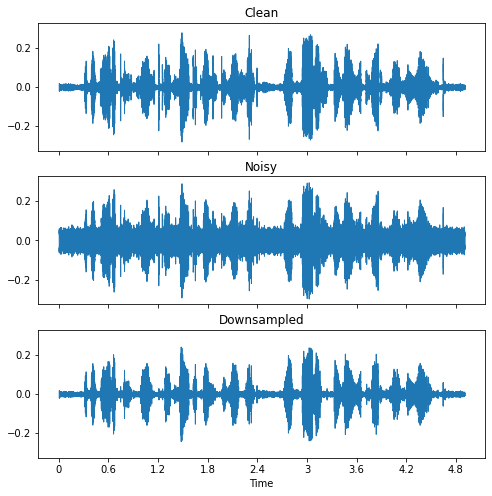

In [43]:
# waveforms
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(8, 8))
librosa.display.waveshow(y=clean_trimmed_files[0], sr=clean_sample_rates[0], ax=ax[0])
ax[0].set(title="Clean")
ax[0].label_outer()

librosa.display.waveshow(y=clean_noisy_trimmed_files[0], sr=clean_sample_rates[0], ax=ax[1])
ax[1].set(title="Noisy")
ax[1].label_outer()

librosa.display.waveshow(y=clean_downsampled_trimmed_files[0], sr=clean_sample_rates[0], ax=ax[2])
ax[2].set(title="Downsampled")
ax[2].label_outer()

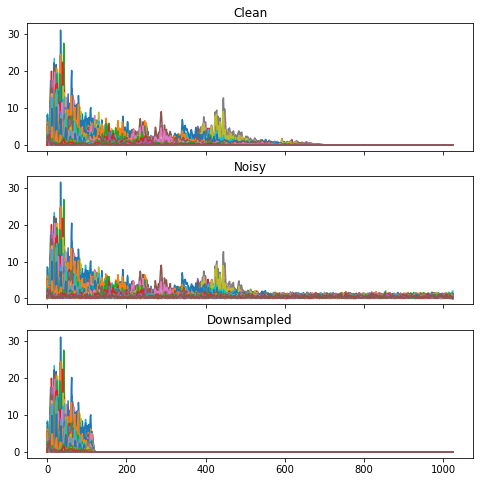

In [42]:
#Fourier Transform

fft = 2048
hl = 512

fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(8, 8))
stft = np.abs(librosa.stft(clean_trimmed_files[1], n_fft = fft, hop_length = hl))
ax[0].plot(stft);
ax[0].set(title="Clean")
ax[0].label_outer()

stft = np.abs(librosa.stft(clean_noisy_trimmed_files[1], n_fft = fft, hop_length = hl))
ax[1].plot(stft);
ax[1].set(title="Noisy")
ax[1].label_outer()

stft = np.abs(librosa.stft(clean_downsampled_trimmed_files[1], n_fft = fft, hop_length = hl))
ax[2].plot(stft);
ax[2].set(title="Downsampled")
ax[2].label_outer()

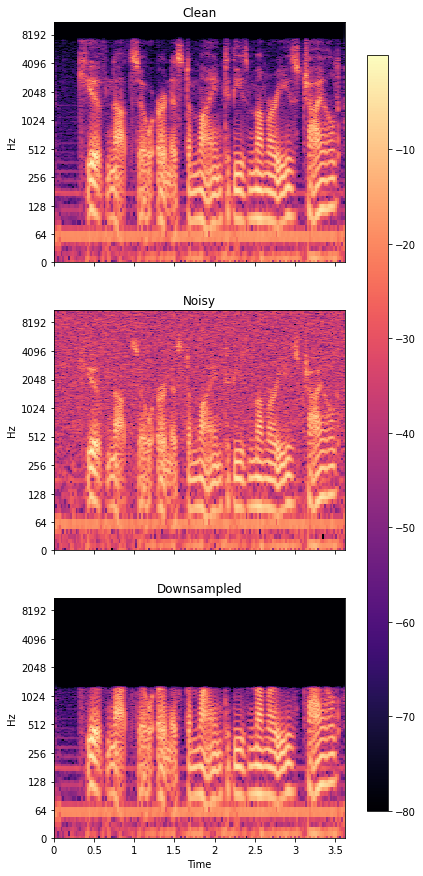

In [50]:
# dB-scaled spectrogram

fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(6, 15))
stft = np.abs(librosa.stft(clean_trimmed_files[1], n_fft = fft, hop_length = hl))
decibel = librosa.amplitude_to_db(stft, ref = np.max)
im = librosa.display.specshow(decibel, sr = clean_sample_rates[1], hop_length = hl, x_axis = 'time', y_axis = 'log',  ax=ax[0])
ax[0].set(title="Clean")
ax[0].label_outer()

stft = np.abs(librosa.stft(clean_noisy_trimmed_files[1], n_fft = fft, hop_length = hl))
decibel = librosa.amplitude_to_db(stft, ref = np.max)
im = librosa.display.specshow(decibel, sr = clean_sample_rates[1], hop_length = hl, x_axis = 'time', y_axis = 'log', ax=ax[1])
ax[1].set(title="Noisy")
ax[1].label_outer()

stft = np.abs(librosa.stft(clean_downsampled_trimmed_files[1], n_fft = fft, hop_length = hl))
decibel = librosa.amplitude_to_db(stft, ref = np.max)
im = librosa.display.specshow(decibel, sr = clean_sample_rates[1], hop_length = hl, x_axis = 'time', y_axis = 'log', ax=ax[2])
ax[2].set(title="Downsampled")
ax[2].label_outer()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax);

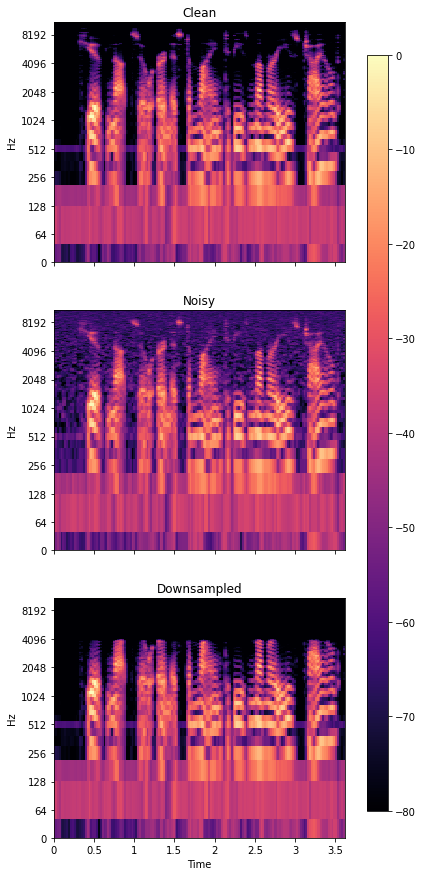

In [44]:
# MEL spectrogram

fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(6, 15))
mel = librosa.feature.melspectrogram(clean_audio_files[1], sr=clean_sample_rates[1])
mel_db = librosa.amplitude_to_db(mel, ref=np.max)
im = librosa.display.specshow(mel_db, sr=clean_sample_rates[1], hop_length=hl, x_axis = 'time', y_axis = 'log', ax = ax[0]);
ax[0].set(title="Clean")
ax[0].label_outer()

mel = librosa.feature.melspectrogram(clean_noisy_audio_files[1], sr=clean_sample_rates[1])
mel_db = librosa.amplitude_to_db(mel, ref=np.max)
im = librosa.display.specshow(mel_db, sr=clean_sample_rates[1], hop_length=hl, x_axis = 'time', y_axis = 'log', ax = ax[1]);
ax[1].set(title="Noisy")
ax[1].label_outer()

mel = librosa.feature.melspectrogram(clean_downsampled_audio_files[1], sr=clean_sample_rates[1])
mel_db = librosa.amplitude_to_db(mel, ref=np.max)
im = librosa.display.specshow(mel_db, sr=clean_sample_rates[1], hop_length=hl, x_axis = 'time', y_axis = 'log', ax = ax[2]);
ax[2].set(title="Downsampled")
ax[2].label_outer()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax);

In [ ]:
# # zero_crossings

# fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10, 4))
# zero_cross = [sum(librosa.zero_crossings(clean_trimmed_files[i], pad=False)) for i in range(len(clean_lines))]
# pd.DataFrame(zero_cross).hist(ax=ax[0]);

# zero_cross = [sum(librosa.zero_crossings(other_trimmed_files[i], pad=False)) for i in range(len(other_lines))]
# pd.DataFrame(zero_cross).hist(ax=ax[1]);

In [ ]:
# # Median-filtering harmonic percussive source separation (HPSS)

# fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(14, 8))
# for i in range(2):
#     y_harm, y_perc = librosa.effects.hpss(clean_trimmed_files[i])
#     ax[i, 0].plot(y_harm, color = '#028A0F');
#     ax[i, 0].plot(y_perc, color = '#FFB100');
#     ax[i, 0].set(title="\n".join(wrap(clean_lines[i], 50)))
#     ax[i, 0].label_outer()

#     y_harm, y_perc = librosa.effects.hpss(other_trimmed_files[i])
#     ax[i, 1].plot(y_harm, color = '#028A0F');
#     ax[i, 1].plot(y_perc, color = '#FFB100');
#     ax[i, 1].set(title="\n".join(wrap(other_lines[i], 50)))
#     ax[i, 1].label_outer()

In [ ]:
# # Mel-frequency cepstral coefficients (MFCCs)

# fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(14, 8))
# for i in range(2):
#   for j in range(2):
#     # mfcc = librosa.feature.mfcc(trimmed_files[i+j], sr=sample_rates[i+j])
#     # librosa.display.specshow(mfcc, sr=sample_rates[i+j], x_axis='time', cmap = 'cool', ax=ax[i, j]);
#     mfcc = librosa.feature.mfcc(trimmed_files[i+j], sr=sample_rates[i+j])
#     mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
#     librosa.display.specshow(mfcc, sr=sample_rates[i+j], x_axis='time', cmap = 'bwr', ax=ax[i, j]);
#     ax[i, j].set(title="\n".join(wrap(lines[i+j], 50)))
#     ax[i, j].label_outer()

In [ ]:
# # chromagram
# hl = 5000

# fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(14, 8))
# for i in range(2):
#   for j in range(2):
#     chromagram = librosa.feature.chroma_stft(trimmed_files[i+j], sr=sample_rates[i+j], hop_length=hl)
#     librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hl, cmap='bwr', ax=ax[i, j]);
#     ax[i, j].set(title="\n".join(wrap(lines[i+j], 50)))
#     ax[i, j].label_outer()